In [9]:
import pandas as pd
import numpy as np

In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

import tensorflow as tf
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.utils import np_utils
from keras.layers import Conv2D, MaxPooling2D
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [11]:
from zipfile import ZipFile
filename= "/content/DATASET.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('Done')


Done


In [12]:
img_width=150
img_height=150

In [13]:
train="/content/DATASET/Train"

In [14]:
test="/content/DATASET/Test"

In [15]:
train_sample=100
test_sample=50
epochs=15
batch_size=10

In [16]:
from keras import backend as K
if K.image_data_format() == 'channels_first':
  input_shape = (3, img_width, img_height)
else:
  input_shape = ( img_width, img_height,3)



In [17]:
train_datagen=ImageDataGenerator(
     rescale=1./255,
     shear_range=0.2,
     zoom_range=0.2,
     horizontal_flip=True

)

In [18]:
test_datagen=ImageDataGenerator(
    rescale=1./255)

In [19]:
train_generator = train_datagen.flow_from_directory(
    train,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary'
    
)

Found 200 images belonging to 2 classes.


In [20]:
test_generator = test_datagen.flow_from_directory(
    test,
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 200 images belonging to 2 classes.


In [21]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=input_shape))
model.add( Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.summary()

model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, kernel_size=(3, 3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))



model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
__________________________________

In [22]:
history=model.fit_generator(
    train_generator,
    steps_per_epoch=train_sample,
    epochs=epochs,
    validation_data=test_generator,
    validation_steps=test_sample
)

Epoch 1/15
100/100 [==============================] - 20s 198ms/step - loss: 0.6854 - accuracy: 0.6190 - val_loss: 0.4759 - val_accuracy: 0.7680
Epoch 2/15
100/100 [==============================] - 14s 139ms/step - loss: 0.4699 - accuracy: 0.7990 - val_loss: 0.5555 - val_accuracy: 0.8660
Epoch 3/15
100/100 [==============================] - 14s 139ms/step - loss: 0.4000 - accuracy: 0.8390 - val_loss: 0.0739 - val_accuracy: 0.9080
Epoch 4/15
100/100 [==============================] - 14s 139ms/step - loss: 0.3166 - accuracy: 0.8690 - val_loss: 0.0709 - val_accuracy: 0.8580
Epoch 5/15
100/100 [==============================] - 14s 137ms/step - loss: 0.2730 - accuracy: 0.8870 - val_loss: 0.0095 - val_accuracy: 0.9620
Epoch 6/15
100/100 [==============================] - 14s 137ms/step - loss: 0.2502 - accuracy: 0.9120 - val_loss: 0.0300 - val_accuracy: 0.9640
Epoch 7/15
100/100 [==============================] - 14s 137ms/step - loss: 0.1843 - accuracy: 0.9360 - val_loss: 0.1093 - val_ac

In [23]:
history.history

{'accuracy': [0.619,
  0.799,
  0.839,
  0.869,
  0.887,
  0.912,
  0.936,
  0.942,
  0.949,
  0.949,
  0.964,
  0.969,
  0.969,
  0.967,
  0.978],
 'loss': [0.6853598210215569,
  0.4699398954212666,
  0.39996033761650324,
  0.31661386765539645,
  0.27298423198983074,
  0.2502027224749327,
  0.18431234491057694,
  0.16364575639367104,
  0.15335177607135847,
  0.14140969616244548,
  0.08765053297101985,
  0.08639574725664716,
  0.10187803157132294,
  0.13577880813470983,
  0.08488011366953288],
 'val_accuracy': [0.7680000066757202,
  0.8659999966621399,
  0.9079999923706055,
  0.8579999804496765,
  0.9620000123977661,
  0.9639999866485596,
  0.9660000205039978,
  0.9900000095367432,
  0.984000027179718,
  0.9900000095367432,
  0.9020000100135803,
  0.984000027179718,
  0.9940000176429749,
  0.9940000176429749,
  0.9800000190734863],
 'val_loss': [0.47585010528564453,
  0.5554524064064026,
  0.07393606752157211,
  0.07090643048286438,
  0.009536183439195156,
  0.0299619622528553,
  0.109

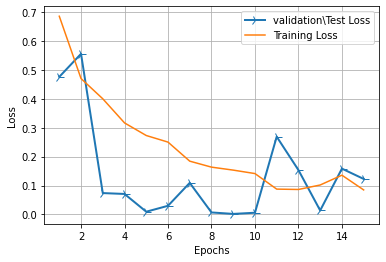

In [24]:
import matplotlib.pyplot as plt

history_dict=history.history

loss_values=history_dict["loss"]
val_loss_value=history_dict["val_loss"]
epochs=range(1, len(loss_values) +1)


line1=plt.plot(epochs , val_loss_value , label='validation\Test Loss')
line2=plt.plot(epochs , loss_values, label='Training Loss')
plt.setp(line1 ,linewidth=2.0 ,marker='+',markersize=10.0)
plt.setp(line1 ,linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid("True")
plt.legend()
plt.show()

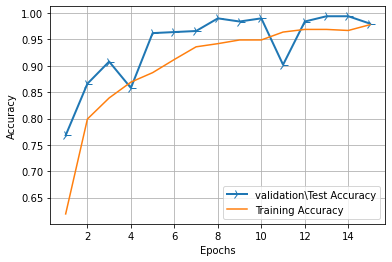

In [25]:
import matplotlib.pyplot as plt

history_dict=history.history

acc_values=history_dict["accuracy"]
val_acc_value=history_dict["val_accuracy"]
epochs=range(1, len(acc_values) +1)


line1=plt.plot(epochs , val_acc_value , label='validation\Test Accuracy')
line2=plt.plot(epochs , acc_values, label='Training Accuracy')
plt.setp(line1 ,linewidth=2.0 ,marker='+',markersize=10.0)
plt.setp(line1 ,linewidth=2.0, marker='4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid("True")
plt.legend()
plt.show()

Checking one image from validation folder that model had learn or not

In [26]:
model.save("jeans_traouser_cnn.h5")

In [36]:
import cv2
cv2.__version__

'4.1.2'

In [37]:
from keras.models import  load_model

classifier= load_model("jeans_traouser_cnn.h5")

In [38]:
import cv2
import numpy as np

def draw_test(name,pred , input_im):
  BLACK = [0,0,0]
  expand_image= cv2.copymakeBorder(input_im , 0,0,0, imageL.shape[0] , cv2.BORDER_CONSTANT,value=BLACK)
  expand_image= CV2.cvtcolor(expand_image , cv2.COLOR_GRAY2BGR)
  cv2.puttext(expand_image , str(pred) , (150,70) , cv2.FONT_HERSHEY_COMPLEX_SMALL ,4 , (0,255,0), 2)
  Cv2.imshow(name , expand_image)




  for i in range(0,10):
    rand=np.random.randint(0,len(test_generator))
    input_im= test_generator[rand]


    imageL=cv2.resize(input_im , None , fx=4 , fy=4 , interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1)


    res = str(classifier.predict_classes(input_im , 1, verbose=0)[0])

    draw_test("prediction", res , imageL)
    cv2.waitkey(0)

cv2.destroyAllWindows()